Predicting the Revenue of a restaurant

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ds=pd.read_csv("restaurant_data.csv")

In [2]:
ds

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,434653.45
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,No,37,21,414977.92
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,930395.87
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,311493.48


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [4]:
ds.isnull().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

In [5]:
ds.dtypes

Name                       object
Location                   object
Cuisine                    object
Rating                    float64
Seating Capacity            int64
Average Meal Price        float64
Marketing Budget            int64
Social Media Followers      int64
Chef Experience Years       int64
Number of Reviews           int64
Avg Review Length         float64
Ambience Score            float64
Service Quality Score     float64
Parking Availability       object
Weekend Reservations        int64
Weekday Reservations        int64
Revenue                   float64
dtype: object

In [6]:
ds.describe()


,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


In [7]:
ds['Name'].unique()

array(['Restaurant 0', 'Restaurant 1', 'Restaurant 2', ...,
       'Restaurant 8365', 'Restaurant 8366', 'Restaurant 8367'],
      dtype=object)

In [8]:
ds['Location'].unique()

array(['Rural', 'Downtown', 'Suburban'], dtype=object)

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [10]:
ds['Weekday Reservations'].unique()

array([ 4,  6, 14, 17, 26, 22, 28, 23, 24, 19, 45, 20, 39,  1, 47, 48, 41,
       43, 10, 65, 46, 25,  2, 15,  9, 21, 16, 11, 60, 32, 61, 31, 35, 40,
       38, 75, 64, 27, 44, 59, 53,  0, 52, 18, 13, 55, 34, 42, 72, 33,  8,
       63, 30, 57,  7, 36, 51, 49, 37, 58, 78, 82, 74, 56, 71, 73,  5, 29,
       12, 62,  3, 69, 66, 68, 80, 81, 67, 83, 54, 76, 50, 77, 70, 79, 86,
       85, 88, 87, 84])

In [11]:
ds['Revenue'].unique()

array([638945.52, 490207.83, 541368.62, ..., 930395.87, 311493.48,
       534142.98])

In [12]:
ds['Weekend Reservations'].unique()

array([13, 48, 27,  9, 37, 12, 56, 16,  4, 46, 18, 38, 30, 24, 50,  0, 65,
       40, 41, 35, 51,  5,  8, 10,  7, 14, 22, 15, 29, 11,  2, 52,  3, 49,
       47, 31, 84,  1, 45, 66, 26,  6, 42, 19, 36, 43, 82, 34, 67, 55, 72,
       25, 20, 54, 39, 23, 28, 17, 44, 21, 58, 33, 59, 85, 68, 64, 70, 53,
       80, 32, 76, 79, 69, 71, 73, 60, 78, 61, 75, 62, 57, 63, 83, 74, 87,
       81, 77, 86, 88])

In [13]:
ds['Parking Availability'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
ds['Service Quality Score'].unique()

array([ 7. ,  3.4,  6.7,  2.8,  2.1,  8.5,  5.3,  4.6,  9.4,  7.4,  7.1,
        2.7,  2.9,  6.9,  1.6,  8. ,  9.5,  4.7,  3.3,  9.3,  6.2,  1.3,
        3. ,  5.4,  3.7,  1.8,  1.5,  8.9,  5.7,  4.5,  4. ,  2. ,  1.7,
        3.8,  3.6,  8.3,  4.4,  4.9,  5.5,  5.6,  5. ,  7.3,  2.6,  1.2,
        7.5,  6.5,  5.9,  6.1,  8.8,  7.6,  7.9,  2.3,  8.7,  4.1,  2.4,
        5.1,  7.7,  9.9,  1. ,  9.1,  9.6,  6.8,  1.9,  5.8,  9.2,  6.3,
        6.6,  9. ,  3.1,  6. ,  1.4,  8.6,  3.2,  8.4,  2.5,  2.2,  7.2,
        3.9,  3.5,  4.8,  7.8,  8.1,  9.8,  5.2,  4.2,  4.3,  8.2,  6.4,
        1.1,  9.7, 10. ])

In [15]:
ds['Ambience Score'].unique()

array([ 1.3,  2.6,  5.3,  4.6,  8.6,  2. ,  1.5,  1.8,  7.1,  6.4,  6.7,
        2.4,  5.6,  7.9,  7.2,  4.9,  1.9,  8.8,  5.7,  9. ,  3.1,  3.8,
        4.8,  6.5,  3.2,  2.7,  2.8,  9.4,  2.5,  4.1,  5.4,  6. ,  8.7,
        4.7,  4.4,  4.5,  8.5,  8.2,  7.8,  1.4,  2.3,  7.6,  7.5,  9.2,
        3.5,  1.7,  7.4,  2.1, 10. ,  2.9,  8.4,  5.9,  9.6,  1.2,  9.5,
        4.2,  9.7,  1.1,  7.3,  5.1,  3. ,  8.1,  3.7,  6.2,  5.5,  9.9,
        9.1,  8. ,  9.3,  5.8,  3.9,  3.3,  6.3,  7. ,  8.3,  9.8,  6.1,
        6.9,  8.9,  4. ,  2.2,  6.6,  1.6,  5. ,  4.3,  3.6,  6.8,  3.4,
        7.7,  1. ,  5.2])

In [16]:
ds['Avg Review Length'].unique()

array([161.92490574, 148.75971737,  56.84918946, ..., 222.95364749,
       178.48285129, 151.83806461])

In [17]:
ds['Number of Reviews'].unique()

array([185, 533, 853,  82,  78, 400, 106, 377, 494, 907, 520, 419, 741,
       420, 988, 687, 685, 971, 421, 539, 302, 535, 920, 307, 488, 651,
        67, 268, 561, 227, 258, 862, 576, 284, 184, 260, 716, 601, 322,
       209, 193, 752, 557, 783, 383, 551, 493, 803, 922, 899, 135, 229,
       129, 866, 610, 203, 228, 348, 375, 804, 888,  58, 477, 241, 139,
        51, 469,  52, 999, 454, 541, 756, 314, 829, 292, 726, 774, 982,
       409, 244, 548, 617, 666, 262, 880, 777,  95, 230, 621, 805, 275,
        81, 396, 495, 224, 878, 655, 949, 179, 712, 872, 346, 301, 501,
       470, 700, 981, 832, 406, 884, 673, 207, 618, 751, 594, 882,  50,
       692, 558, 593, 638, 144, 746, 326, 584, 166, 505,  79, 932, 374,
       969, 123, 881, 468, 967, 856, 791, 312, 600, 453, 153, 489, 913,
       755, 192, 763, 966, 256, 595, 852, 310, 873, 132, 870, 799, 221,
       747, 411,  91, 789, 323, 823, 549, 181, 502, 959, 474, 992, 658,
       102, 838, 446, 243, 448, 513, 404, 222, 389, 242, 479, 43

In [18]:
ds['Chef Experience Years'].unique()

array([13,  8, 18,  9,  5, 11, 14, 16,  4, 19,  2, 17,  6, 15,  1,  3,  7,
       10, 12])

In [19]:
ds['Social Media Followers'].unique()

array([23406, 42741, 37285, ..., 63945,  7170, 24268])

In [20]:
ds['Marketing Budget'].unique()

array([2224, 4416, 2796, ..., 5150,  915, 5949])

In [21]:
ds['Cuisine'].unique()

array(['Japanese', 'Mexican', 'Italian', 'Indian', 'French', 'American'],
      dtype=object)

In [22]:
ds['Rating'].unique()

array([4. , 3.2, 4.7, 4.4, 4.9, 4.1, 4.2, 5. , 4.3, 3.1, 4.8, 4.6, 3.6,
       3.3, 3.4, 3.5, 3.7, 3.8, 4.5, 3. , 3.9])

In [23]:
ds['Seating Capacity'].unique()

array([38, 76, 48, 34, 88, 79, 49, 61, 37, 32, 40, 77, 42, 59, 87, 56, 60,
       72, 53, 57, 75, 82, 41, 35, 68, 64, 31, 46, 45, 74, 71, 84, 33, 51,
       54, 67, 70, 89, 55, 83, 39, 47, 58, 81, 63, 80, 69, 78, 43, 85, 50,
       90, 52, 44, 36, 30, 65, 86, 73, 62, 66])

In [24]:
ds['Average Meal Price'].unique()

array([73.98, 28.11, 48.29, ..., 72.06, 53.63, 71.07])

<Axes: xlabel='Location', ylabel='count'>

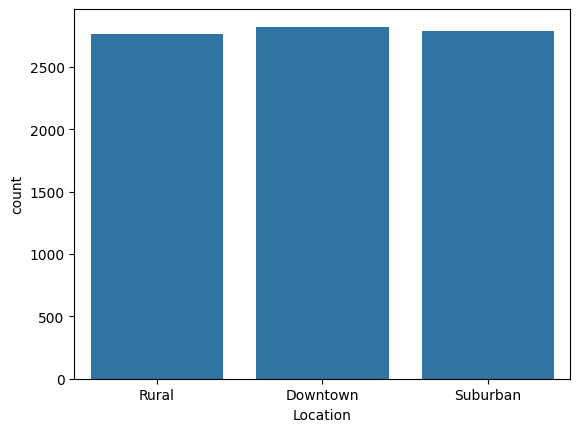

In [25]:
sns.countplot(x='Location', data=ds)

In [26]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [27]:
categorical_columns = ['Name', 'Location', 'Cuisine', 'Parking Availability','Rating']
numeric_columns = ['Seating Capacity', 'Average Meal Price', 'Marketing Budget', 'Social Media Followers', 'Chef Experience Years','Number of Reviews','Avg Review Length','Ambience Score','Service Quality Score','Weekend Reservations','Weekday Reservations','Revenue']

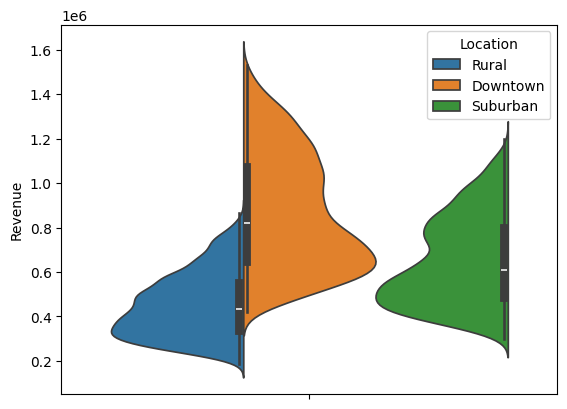

In [28]:
sns.violinplot(y='Revenue', hue='Location',data=ds, 
               split=True
              );

c:\Users\ELCOT\Desktop\revenue_prediction\new_venv_name\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ELCOT\Desktop\revenue_prediction\new_venv_name\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 51.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Parking Availability', ylabel='Revenue'>

c:\Users\ELCOT\Desktop\revenue_prediction\new_venv_name\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 71.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ELCOT\Desktop\revenue_prediction\new_venv_name\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 70.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


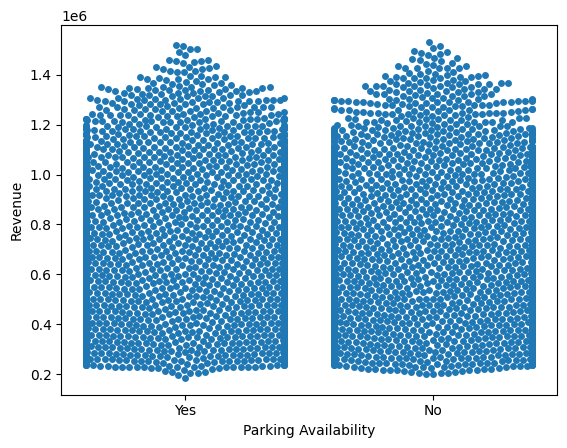

In [29]:
sns.swarmplot(x='Parking Availability', y='Revenue', data=ds)

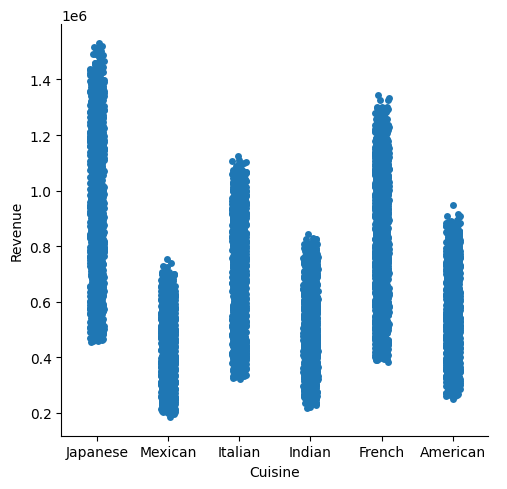

In [30]:
sns.catplot(x='Cuisine', y='Revenue', data=ds)

<Axes: xlabel='Location', ylabel='Revenue'>

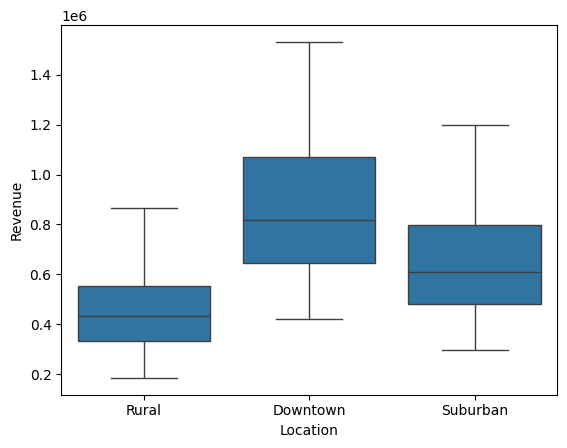

In [31]:
sns.boxplot(x='Location', y='Revenue', data=ds)

<Axes: xlabel='Rating', ylabel='Revenue'>

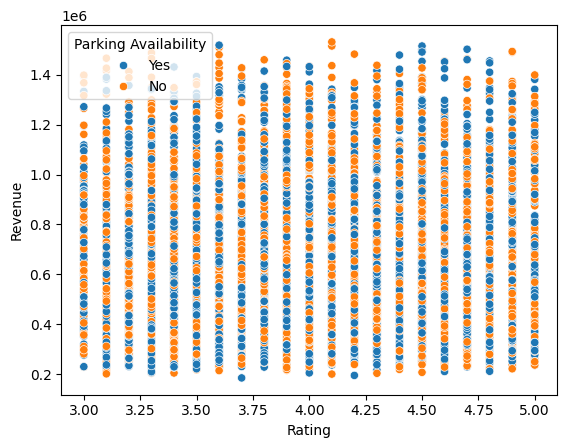

In [32]:
sns.scatterplot(x='Rating', y='Revenue', hue='Parking Availability', data=ds)

<Axes: xlabel='Revenue'>

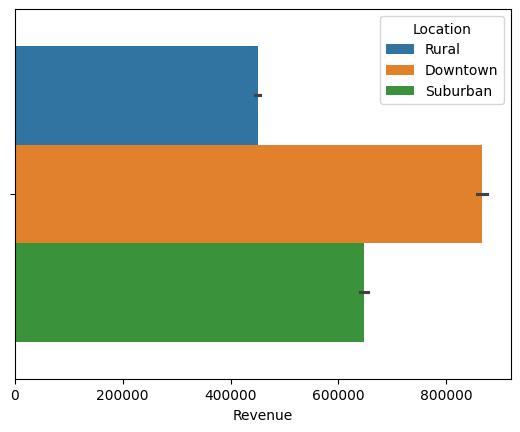

In [33]:
sns.barplot(x='Revenue', hue='Location', data=ds)

<Axes: xlabel='Chef Experience Years', ylabel='Revenue'>

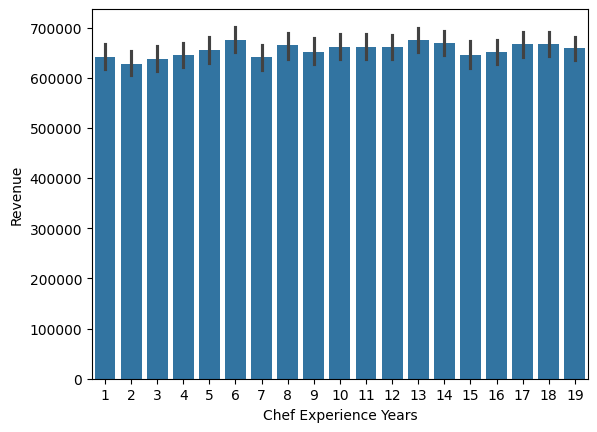

In [34]:
sns.barplot(x='Chef Experience Years', y='Revenue', data=ds)

<Axes: xlabel='Parking Availability', ylabel='Revenue'>

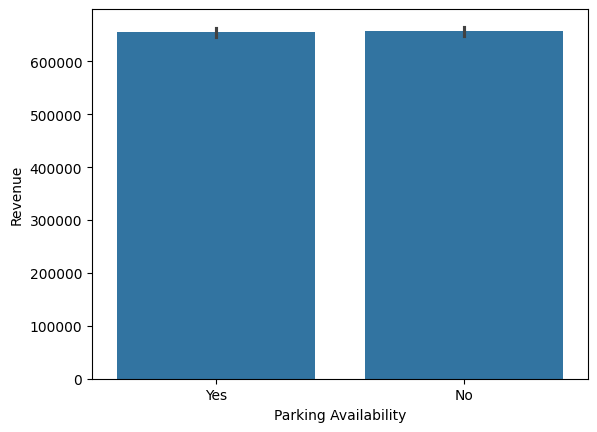

In [35]:
sns.barplot(x='Parking Availability', y='Revenue', data=ds)

<Axes: xlabel='Location', ylabel='Revenue'>

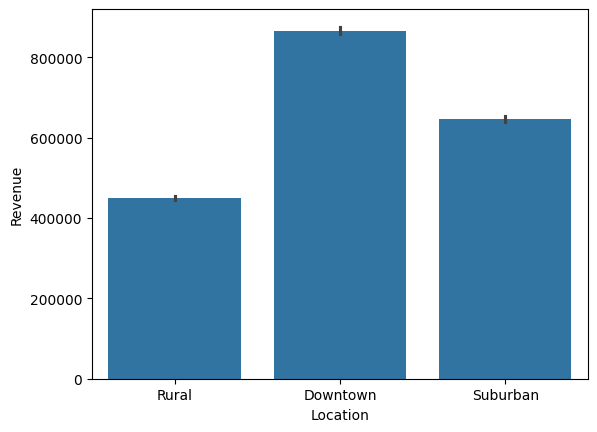

In [36]:
sns.barplot(x='Location', y='Revenue', data=ds)

<Axes: xlabel='Cuisine', ylabel='Revenue'>

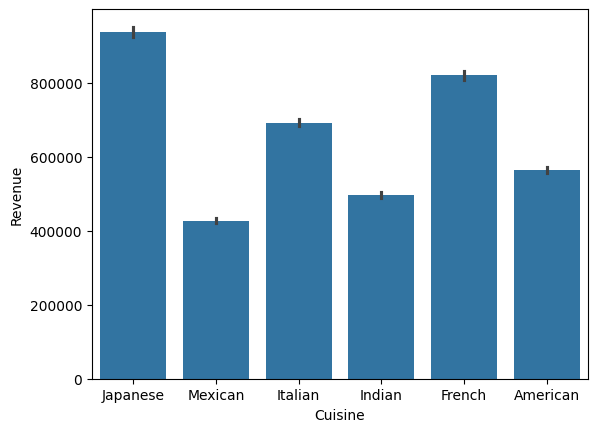

In [37]:
sns.barplot(x='Cuisine', y='Revenue', data=ds)

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_4912\1169114935.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Weekday Reservations'])


np.float64(0.5884299821556125)

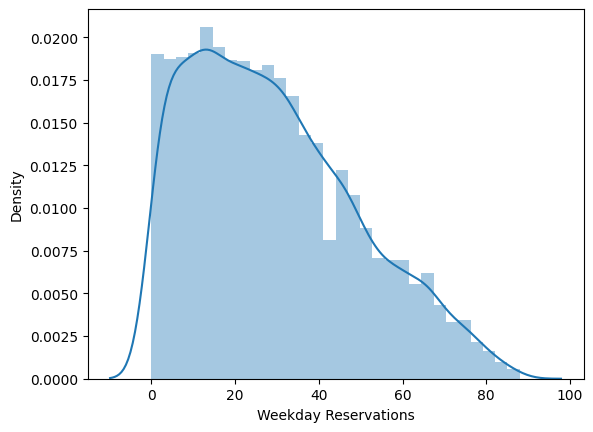

In [38]:
sns.distplot(ds['Weekday Reservations'])
ds['Weekday Reservations'].skew()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_4912\241056691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Weekend Reservations'])


np.float64(0.5746995022293422)

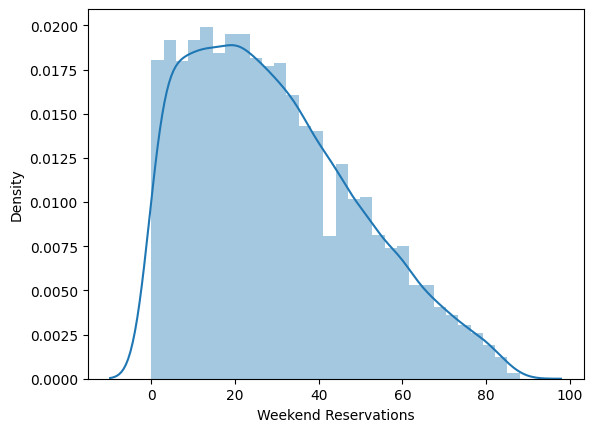

In [39]:
sns.distplot(ds['Weekend Reservations'])
ds['Weekend Reservations'].skew()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_4912\1370961951.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Number of Reviews'])


np.float64(0.0017116323747878163)

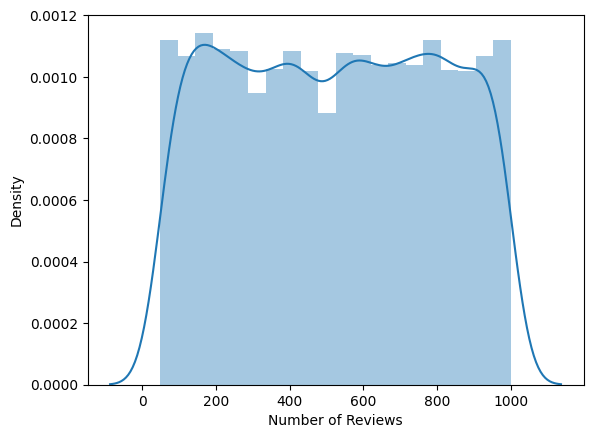

In [40]:
sns.distplot(ds['Number of Reviews'])
ds['Number of Reviews'].skew()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_4912\1207296561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Chef Experience Years'])


np.float64(-0.008891108702299382)

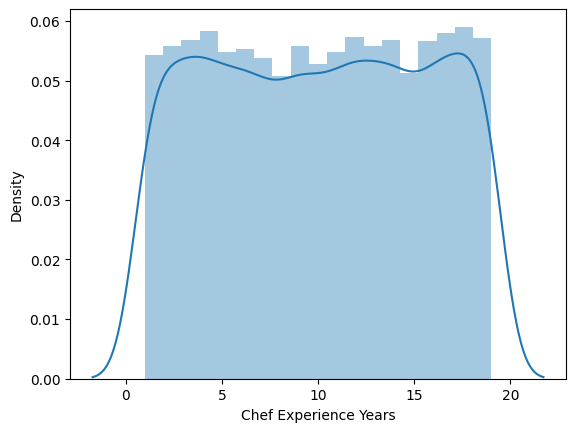

In [41]:
sns.distplot(ds['Chef Experience Years'])
ds['Chef Experience Years'].skew()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_4912\479951641.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Social Media Followers'])


np.float64(1.0826807083108967)

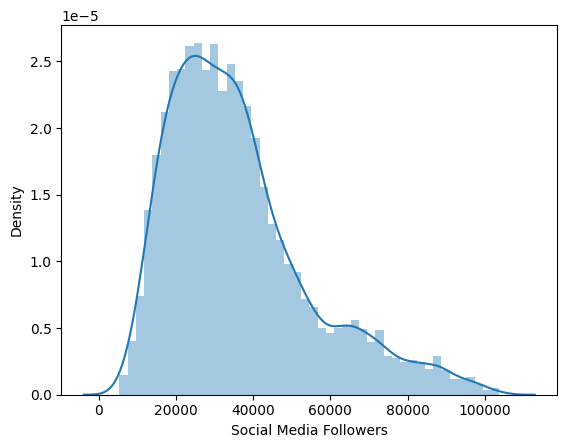

In [42]:
sns.distplot(ds['Social Media Followers'])
ds['Social Media Followers'].skew()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_4912\970434041.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Marketing Budget'])


np.float64(1.1295784874151)

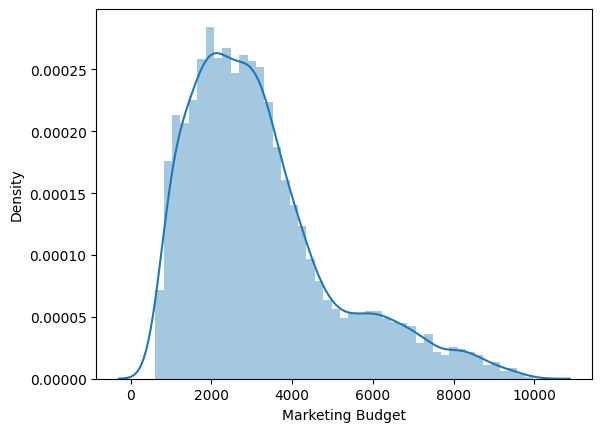

In [43]:
sns.distplot(ds['Marketing Budget'])
ds['Marketing Budget'].skew()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_4912\654349889.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Average Meal Price'])


np.float64(0.3124999840094506)

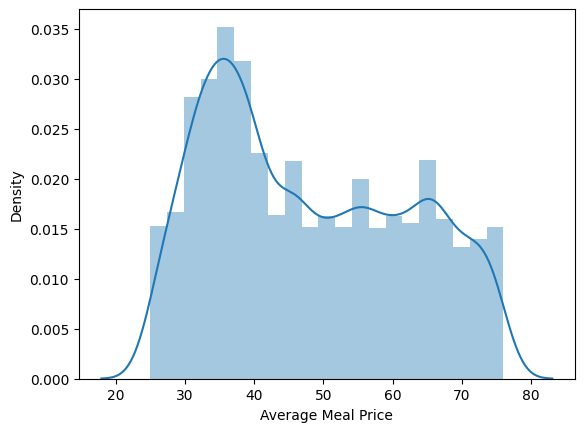

In [44]:
sns.distplot(ds['Average Meal Price'])
ds['Average Meal Price'].skew()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_4912\2138618890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Seating Capacity'])


np.float64(-0.009677385034987359)

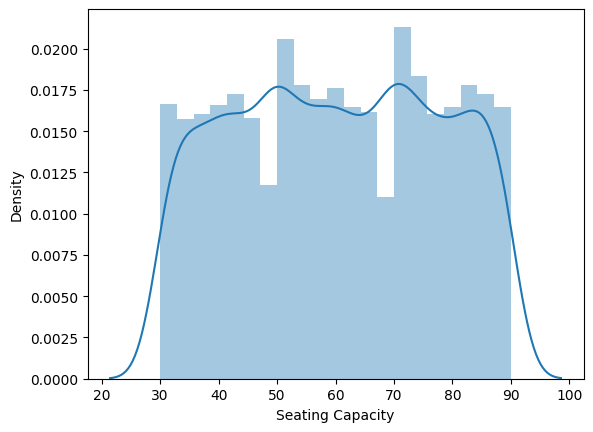

In [45]:
sns.distplot(ds['Seating Capacity'])
ds['Seating Capacity'].skew()

<Axes: xlabel='Cuisine', ylabel='count'>

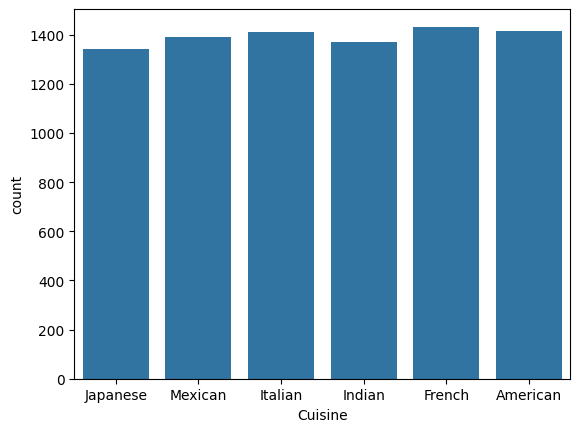

In [46]:
sns.countplot(x='Cuisine',data=ds)

In [47]:
plt.rcParams["figure.figsize"] = (10,5)

<Axes: xlabel='Parking Availability', ylabel='count'>

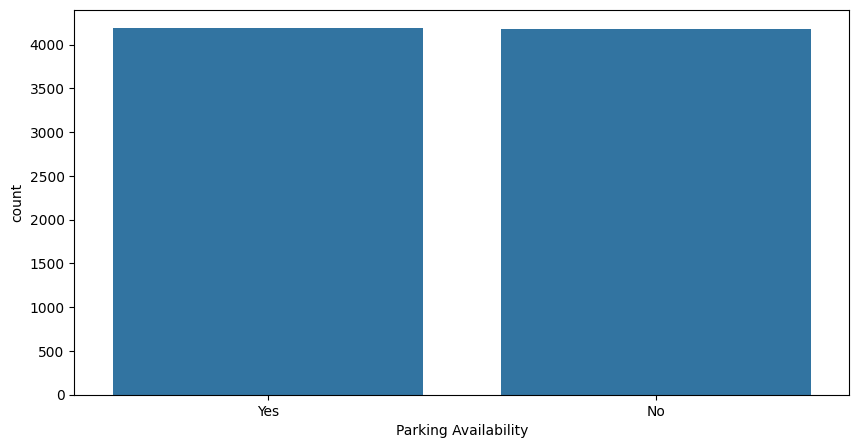

In [48]:
sns.countplot(x='Parking Availability',data=ds)

<Axes: xlabel='Rating', ylabel='count'>

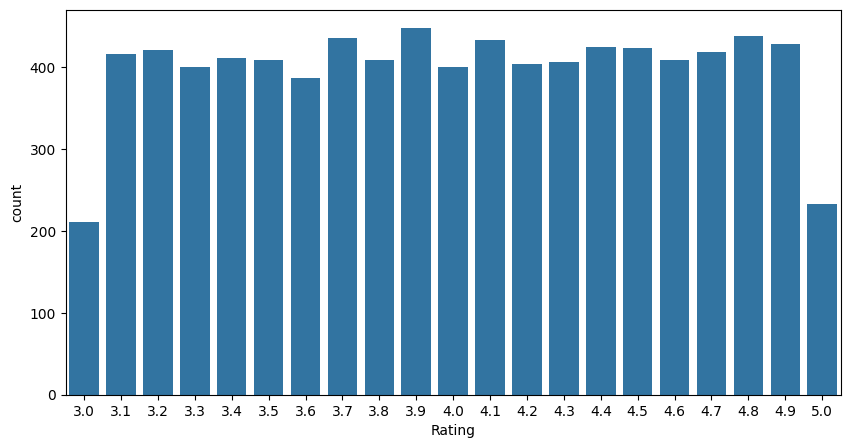

In [49]:
sns.countplot(x=ds['Rating'], data=ds)

In [50]:
categorical_columns = [ 'Location', 'Cuisine', 'Parking Availability']
numeric_columns = ['Rating','Seating Capacity', 'Average Meal Price', 'Marketing Budget', 'Social Media Followers', 'Chef Experience Years','Number of Reviews','Avg Review Length','Ambience Score','Service Quality Score','Weekend Reservations','Weekday Reservations','Revenue']

<Axes: >

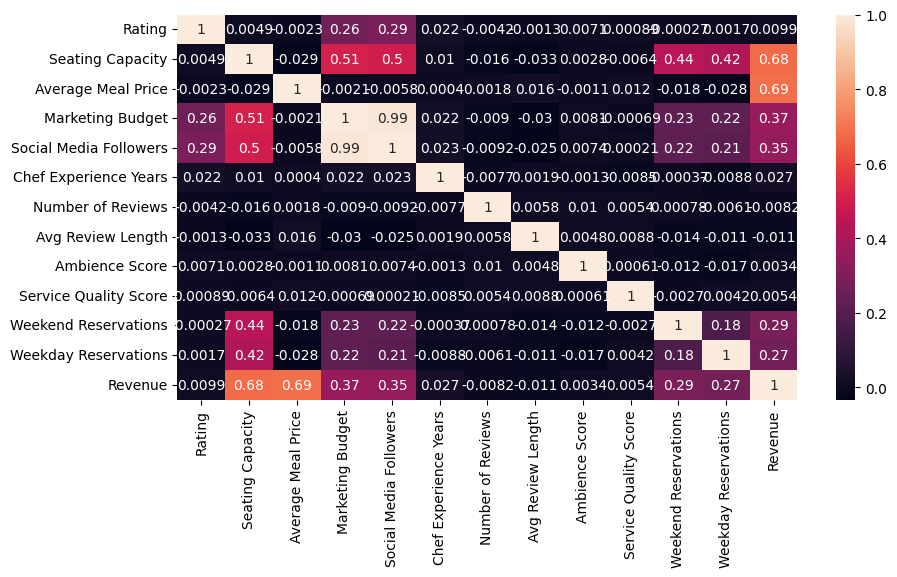

In [51]:
corr = ds[numeric_columns].corr()
sns.heatmap(corr, annot=True)

c:\Users\ELCOT\Desktop\revenue_prediction\new_venv_name\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


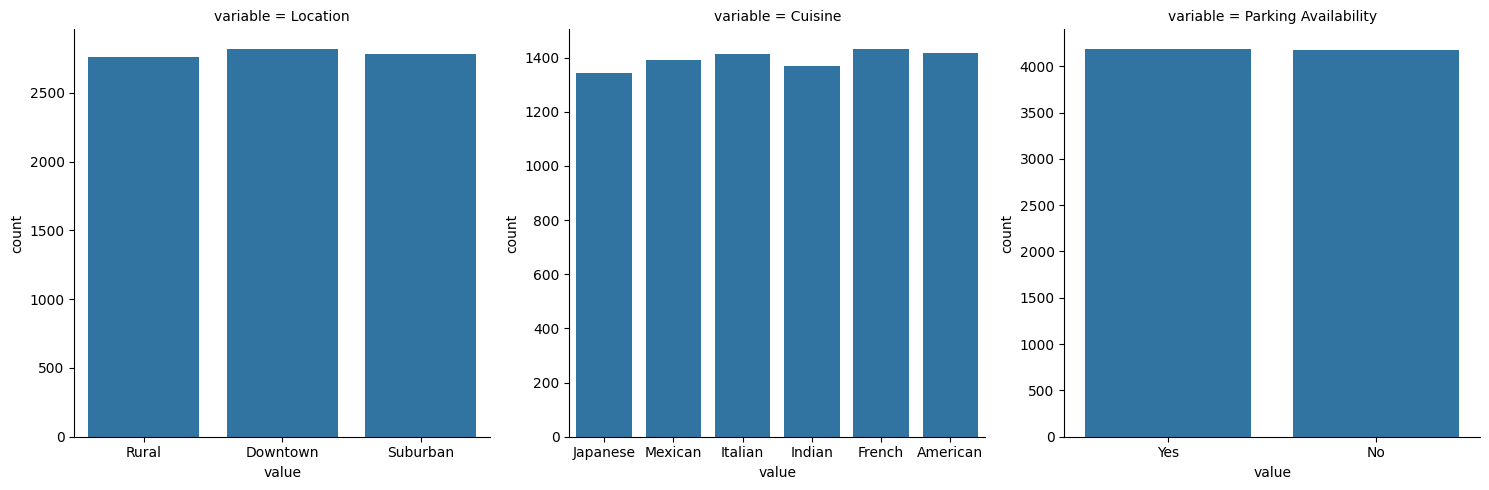

In [52]:
#Create a countplot
f = pd.melt(ds, value_vars=categorical_columns)
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, height = 5)
g = g.map(sns.countplot, "value")

c:\Users\ELCOT\Desktop\revenue_prediction\new_venv_name\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\ELCOT\Desktop\revenue_prediction\new_venv_name\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

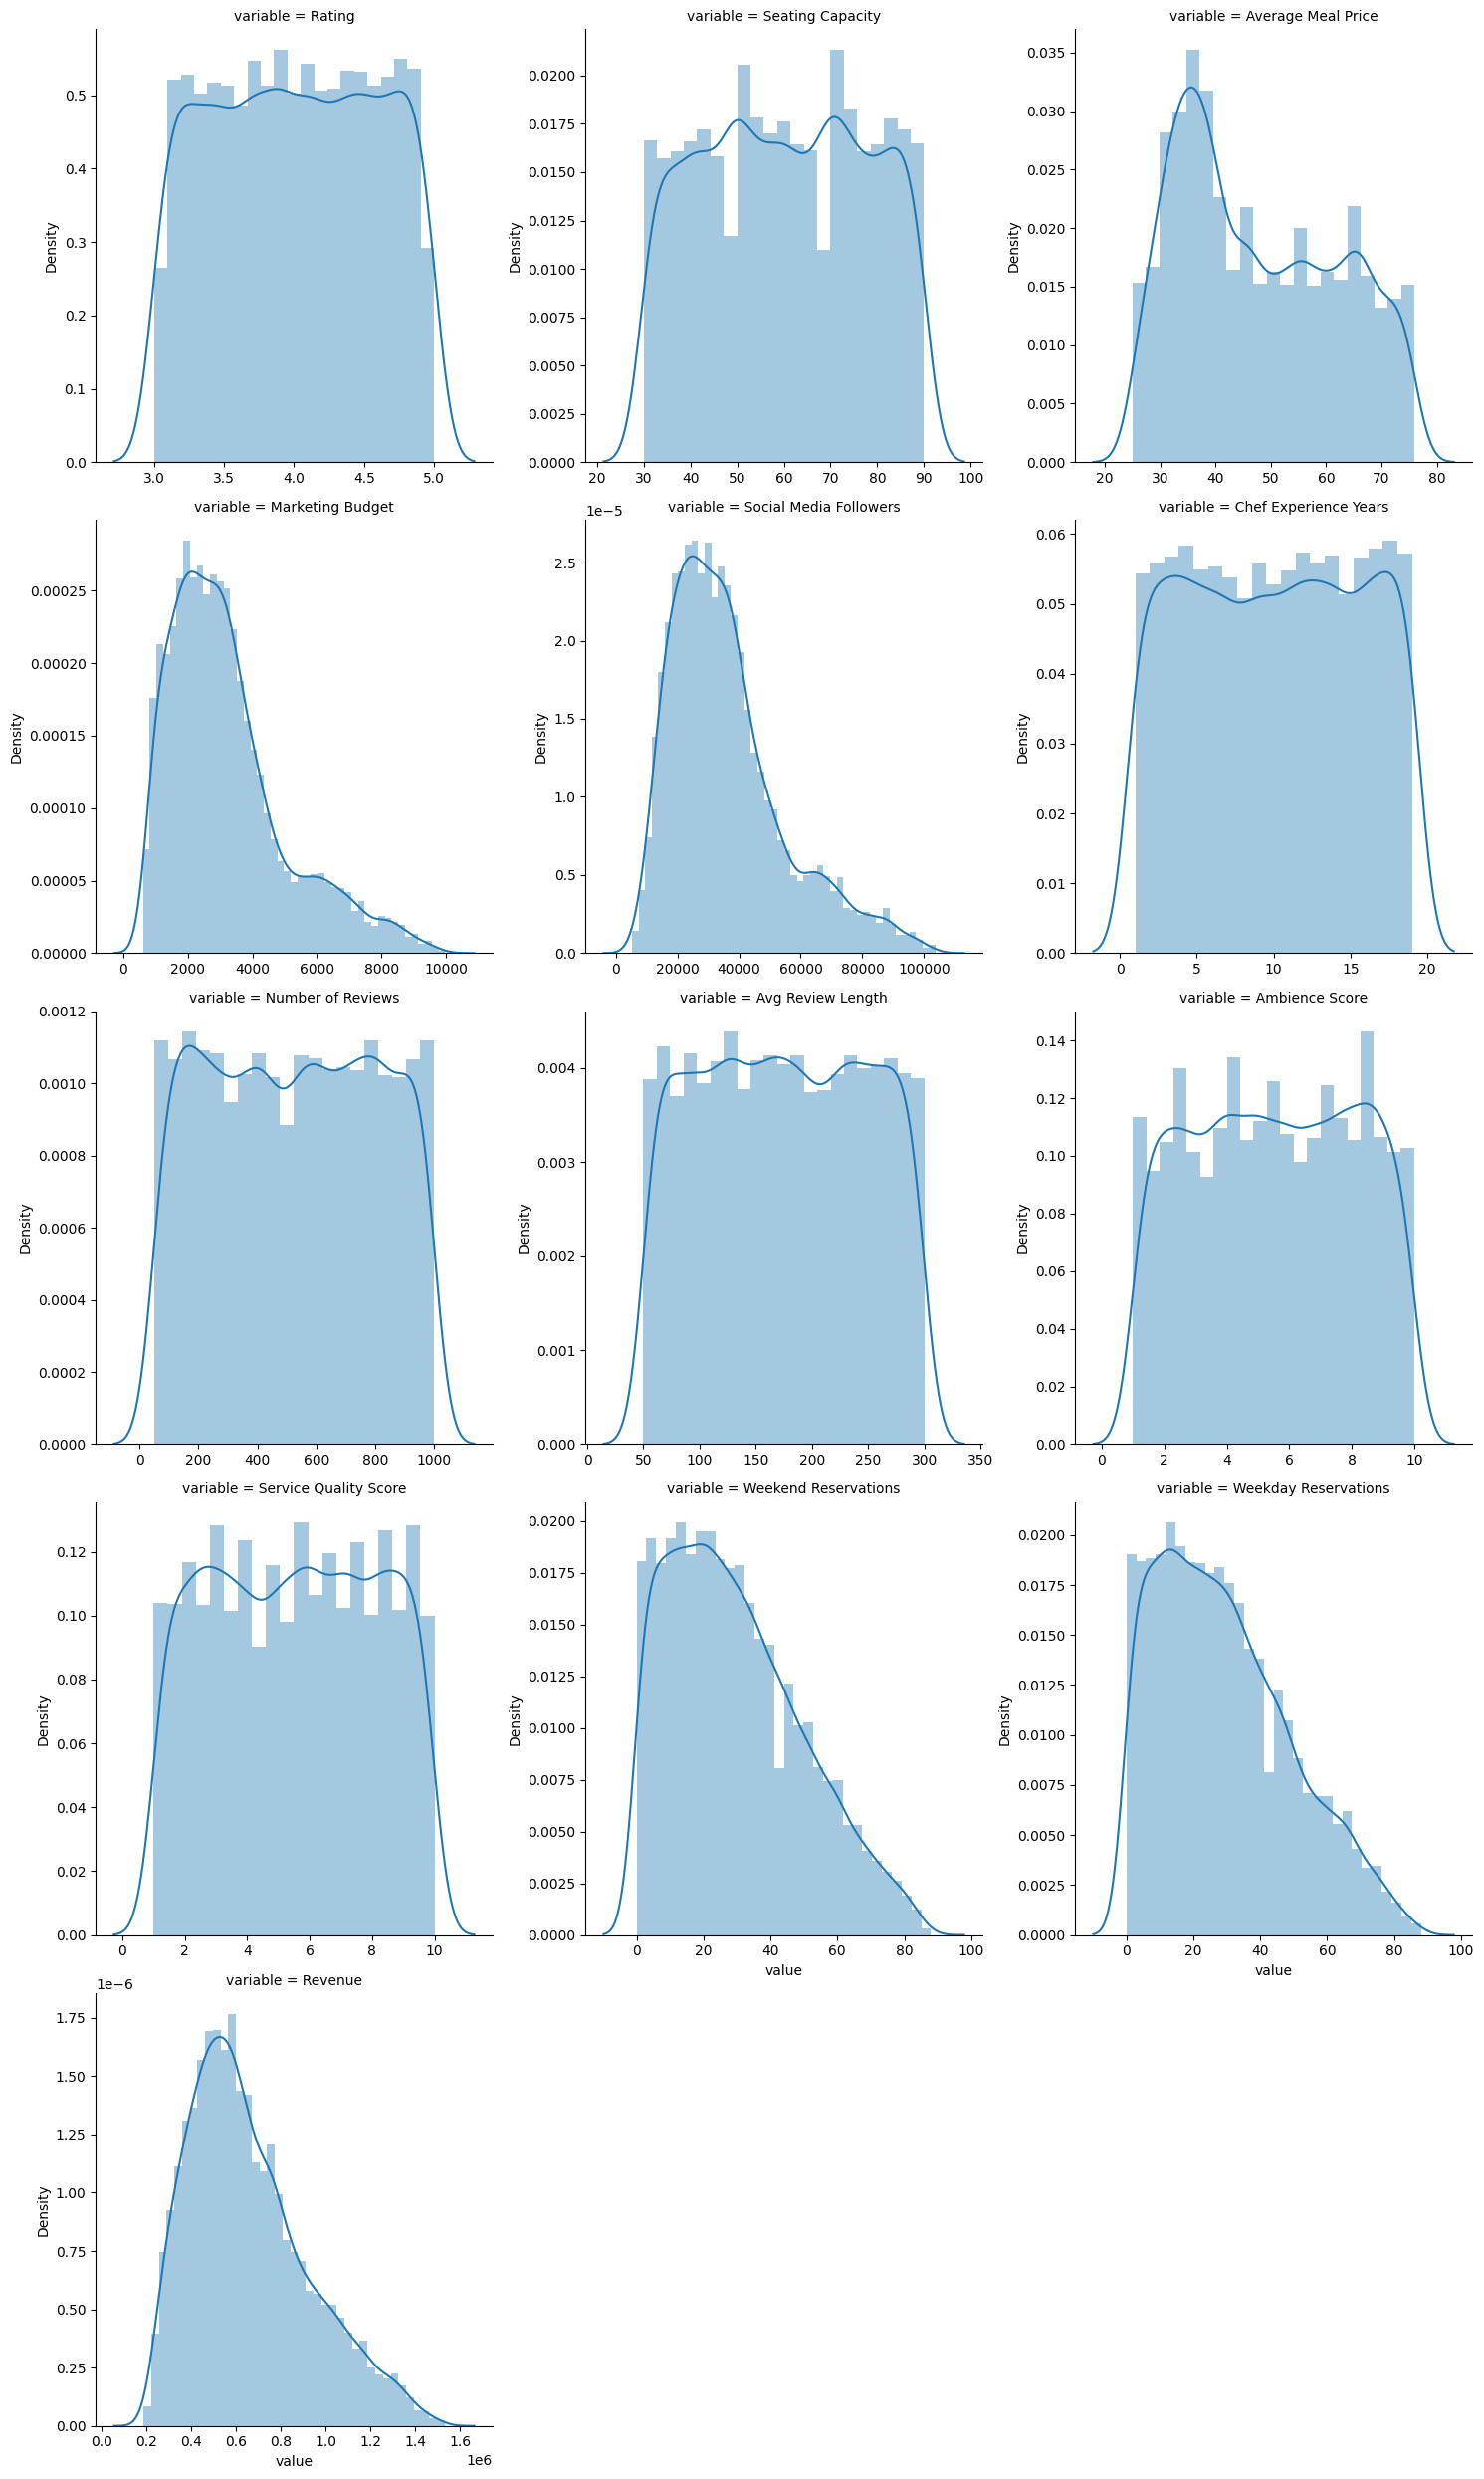

In [53]:
f = pd.melt(ds, value_vars=numeric_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height = 5)
g = g.map(sns.distplot, "value")

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_4912\1572304692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Revenue'])


np.float64(0.7358902240332929)

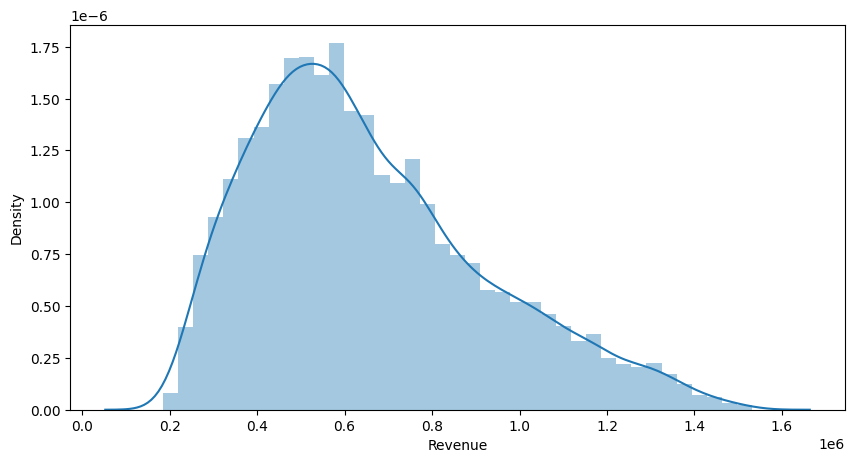

In [54]:
sns.distplot(ds['Revenue'])
ds['Revenue'].skew()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_4912\2388695181.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.cbrt(ds['Revenue']))


np.float64(0.18100740693420703)

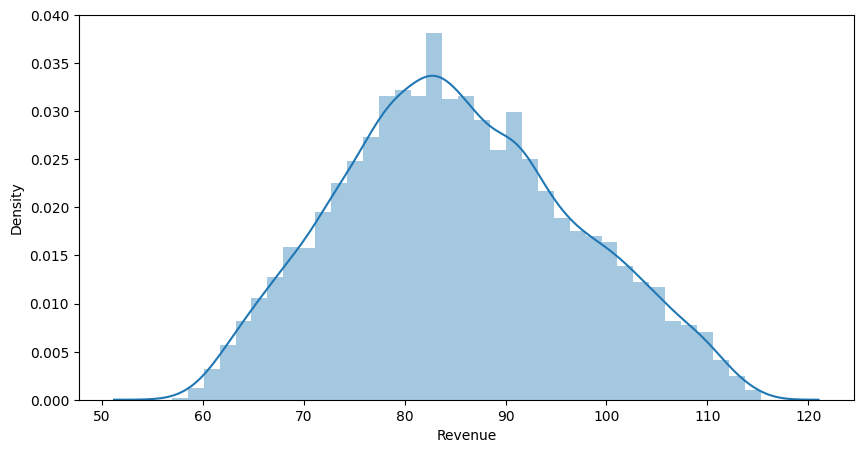

In [55]:
sns.distplot(np.cbrt(ds['Revenue']))
np.cbrt(ds['Revenue']).skew()

In [56]:
y=np.cbrt(ds["Revenue"])

EDA

Data Cleaning

In [57]:
numeric_columns = ds.select_dtypes(include=[float, int]).columns

print(ds.isna().sum())


Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64


Preprocessing

outlier detection

In [58]:
Q1 = ds[numeric_columns].quantile(0.25)
Q3 = ds[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
mask = ~((ds[numeric_columns] < (Q1 - 1.5 * IQR)) | (ds[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
ds_cleaned = ds[mask]

ds_cleaned.head()


,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
5,Restaurant 5,Downtown,Indian,4.4,79,35.69,6787,75378,5,400,247.544461,2.0,8.5,Yes,27,22,644220.90


Feature engineering

In [59]:
ds['marketing_efficiency'] = ds['Marketing Budget'] / ds['Social Media Followers']
ds['marketing_efficiency']

0       0.095018
1       0.103320
2       0.074990
3       0.076706
4       0.090588
          ...   
8363    0.097539
8364    0.097298
8365    0.093033
8366    0.098605
8367    0.082537
Name: marketing_efficiency, Length: 8368, dtype: float64

In [60]:
ds['marketing_efficiency'].unique()

array([0.09501837, 0.10332   , 0.07498994, ..., 0.09303308, 0.0986053 ,
       0.08253667])

In [61]:
ds['Location'].unique()

array(['Rural', 'Downtown', 'Suburban'], dtype=object)

In [62]:
ds.loc[ds['Location']=='Rural','Location'] = 1
ds.loc[ds['Location']== 'Downtown' ,'Location'] = 2
ds.loc[ds['Location']=='Suburban','Location'] = 3


In [63]:
ds['Cuisine'].unique()

array(['Japanese', 'Mexican', 'Italian', 'Indian', 'French', 'American'],
      dtype=object)

In [64]:
ds.loc[ds['Cuisine']=='Japanese','Cuisine'] = 1
ds.loc[ds['Cuisine']== 'Mexican' ,'Cuisine'] = 2
ds.loc[ds['Cuisine']=='Italian','Cuisine'] = 3
ds.loc[ds['Cuisine']=='Indian','Cuisine'] = 4
ds.loc[ds['Cuisine']== 'French' ,'Cuisine'] = 5
ds.loc[ds['Cuisine']=='American','Cuisine'] = 6

In [65]:
ds['Parking Availability'].unique()

array(['Yes', 'No'], dtype=object)

In [66]:
ds.loc[ds['Parking Availability']=='Yes','Parking Availability'] = 1
ds.loc[ds['Parking Availability']== 'No' ,'Parking Availability'] = 0

In [67]:
ds

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue,marketing_efficiency
0,Restaurant 0,1,1,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,1,13,4,638945.52,0.095018
1,Restaurant 1,2,2,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,1,48,6,490207.83,0.103320
2,Restaurant 2,1,3,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,0,27,14,541368.62,0.074990
3,Restaurant 3,1,3,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,1,9,17,404556.80,0.076706
4,Restaurant 4,2,1,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,0,37,26,1491046.35,0.090588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,3,4,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,1,37,0,434653.45,0.097539
8364,Restaurant 8364,1,4,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,0,37,21,414977.92,0.097298
8365,Restaurant 8365,2,3,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,1,83,21,930395.87,0.093033
8366,Restaurant 8366,1,6,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,0,6,21,311493.48,0.098605


Model Building and Training

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Split data

In [1]:

target = 'Revenue'
X = np.cbrt(ds.drop(columns=['Revenue','Name','marketing_efficiency']))
#y=ds[target]
y=np.cbrt(ds["Revenue"])
#numeric_columns = X.select_dtypes(include=[float, int]).columns

#  use one-hot encoding
#categorical_columns = X.select_dtypes(include=[object]).columns
#X = pd.get_dummies(X, columns=categorical_columns)
#X = X[numeric_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'np' is not defined

In [70]:
X

,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations
0,1,1,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,1,13,4
1,2,2,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,1,48,6
2,1,3,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,0,27,14
3,1,3,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,1,9,17
4,2,1,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,0,37,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,3,4,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,1,37,0
8364,1,4,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,0,37,21
8365,2,3,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,1,83,21
8366,1,6,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,0,6,21


Linear Regression model

In [71]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [72]:
from sklearn.metrics import mean_absolute_error

In [73]:
mse = mean_absolute_error(y_train, lr_model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 0.9090


In [74]:
mse = mean_absolute_error(y_test, lr_model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Test Set Mean Absolute Error: 0.9252


In [75]:
import pickle

pickle.dump(lr_model,open('revenue_lr.pkl','wb'))
LinearRegression = pickle.load(open('revenue_lr.pkl','rb'))

 Random Forest model

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [77]:
mse = mean_absolute_error(y_train, rf_model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)



Training Set Mean Absolute Error: 0.1069


In [78]:
mse = mean_absolute_error(y_test, rf_model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Test Set Mean Absolute Error: 0.2668


In [79]:
import pickle

pickle.dump(rf_model,open('revenue_rf.pkl','wb'))
RandomForestRegressor= pickle.load(open('revenue_rf.pkl','rb'))

Stacking Regressor

In [80]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor


estimators = [
    ('rf', rf_model),
    ('gb', GradientBoostingRegressor())
]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())
stacking_model.fit(X_train, y_train)


StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('gb', GradientBoostingRegressor())],
                  final_estimator=Ridge())

In [81]:
ms = mean_absolute_error(y_train, stacking_model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % ms)

Training Set Mean Absolute Error: 0.1463


In [82]:
ms = mean_absolute_error(y_test, stacking_model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % ms)

Test Set Mean Absolute Error: 0.2273


In [83]:
import pickle

pickle.dump(stacking_model,open('revenue_stacking.pkl','wb'))
stacking_model = pickle.load(open('revenue_stacking.pkl','rb'))

In [84]:
# new_data = {
#     'Location':1,

#     'Cuisine':1,
#     'Rating': 4,
#     'Seating Capacity': 35,
#     'Average Meal Price': 73.98,
#     'Marketing Budget': 2224,
#     'Social Media Followers': 23406,
#     'Chef Experience Years': 13,
#     'Number of Reviews': 185,
#     'Avg Review Length': 161.924905743279,
#     'Ambience Score': 1.3,
#     'Service Quality Score': 7,
#     'Parking Availability':1,
#     'Weekend Reservations': 13,
#     'Weekday Reservations': 4,
#    'marketing_efficiency':0.095018

# }

In [85]:
# new_data_df = pd.DataFrame([new_data])

In [86]:
# predicted_revenue_rf = rf_model.predict(new_data_df)
# print(f"Predicted Revenue of randomforest: {predicted_revenue[0]**3:.2f}")

In [87]:
# predicted_revenue_lr = lr_model.predict(new_data_df)
# print(f"Predicted Revenue of linerReg: {predicted_revenue[0]**3:.2f}")

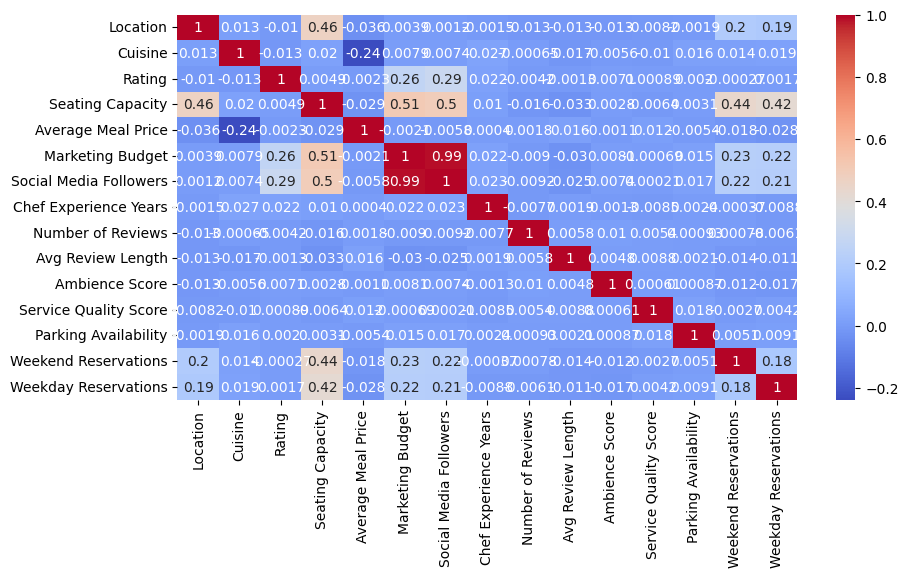

In [88]:
#numeric_df = ds.select_dtypes(include=[float, int])
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.show()

In [89]:
columns = [
4. , 3.2, 4.7, 4.4, 4.9, 4.1, 4.2, 5. , 4.3, 3.1, 4.8, 4.6, 3.6,
       3.3, 3.4, 3.5, 3.7, 3.8, 4.5, 3. , 3.9]


options = ""
for i, x in enumerate(columns):
     options += f'<option value="{i+1}">{x}</option>\n'

print(options)

<option value="1">4.0</option>
<option value="2">3.2</option>
<option value="3">4.7</option>
<option value="4">4.4</option>
<option value="5">4.9</option>
<option value="6">4.1</option>
<option value="7">4.2</option>
<option value="8">5.0</option>
<option value="9">4.3</option>
<option value="10">3.1</option>
<option value="11">4.8</option>
<option value="12">4.6</option>
<option value="13">3.6</option>
<option value="14">3.3</option>
<option value="15">3.4</option>
<option value="16">3.5</option>
<option value="17">3.7</option>
<option value="18">3.8</option>
<option value="19">4.5</option>
<option value="20">3.0</option>
<option value="21">3.9</option>



In [90]:
for field in columns:
    print(f"{field} = request.form['{field}']")

4.0 = request.form['4.0']
3.2 = request.form['3.2']
4.7 = request.form['4.7']
4.4 = request.form['4.4']
4.9 = request.form['4.9']
4.1 = request.form['4.1']
4.2 = request.form['4.2']
5.0 = request.form['5.0']
4.3 = request.form['4.3']
3.1 = request.form['3.1']
4.8 = request.form['4.8']
4.6 = request.form['4.6']
3.6 = request.form['3.6']
3.3 = request.form['3.3']
3.4 = request.form['3.4']
3.5 = request.form['3.5']
3.7 = request.form['3.7']
3.8 = request.form['3.8']
4.5 = request.form['4.5']
3.0 = request.form['3.0']
3.9 = request.form['3.9']
